# Problem 2
## Problem 2a

In [4]:
import numpy as np
import pandas as pd
import urllib.request as url

dat = url.urlopen("http://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2017/data/ProblemSet2_Prob2_NucData.txt").read()
dat = dat.decode("utf-8")
dat = dat.split("\n")
df = pd.DataFrame(dat)
df.columns=['Values']
df = df.drop(df.index[[20000]])

In [5]:
df['Values'] = pd.to_numeric(df['Values'])

In [3]:
min(df['Values'])

-1.9476180000000001

In [6]:
import scipy.integrate as integrate

Create 100 separate entries in a dictionary for easy retrieval when calculating log-likelihoods:

In [7]:
from collections import defaultdict
d = defaultdict()
k = 0
while k<100:
    d[k] = df['Values'][(0+200*k):(200+200*k)]
    k +=1

In [8]:
b=1
sigma=1
dat = list()
for t in d[0]:
    val, err = -np.log( integrate.quad(lambda tt: (np.exp(-((t-tt)**2)/(2*sigma**2)   )/(np.sqrt(2*np.pi)*sigma)) * (np.exp( -tt/b )/b ), 0,np.inf) )
    dat.append(val)
sum(dat)

303.86844767899737

In [9]:
dvals = defaultdict()

Working without a for loop on the minimization:

The normalization factor:

In [10]:
from scipy.special import erf

integrate.quad(lambda  t: (1/2)*np.exp(-t/b)*(np.exp(t/b)*np.exp(-(1/2)*(2*b*t-sigma**2)/b**2)+np.exp((1/2)*sigma**2/b**2)*erf((1/2)*np.sqrt(2)*(b*t-sigma**2)/(sigma*b)))/b, -2,700)

(0.9936949926697197, 4.596900699301095e-10)

So the function IS normalized...

The integrand:

In [ ]:
(1/2)*np.exp(-t/b)*(np.exp(t/b)*np.exp(-(1/2)*(2*b*t-sigma**2)/b**2)+np.exp((1/2)*sigma**2/b**2)*erf((1/2)*np.sqrt(2)*(b*t-sigma**2)/(sigma*b)))/b

In [11]:
def LLH1(x):
    b = x[0]
    sigma = x[1]
    dat = list()
    for t in d[0]:
        val = -np.log( (1/2)*np.exp(-t/b)*(np.exp(t/b)*np.exp(-(1/2)*(2*b*t-sigma**2)/b**2)+np.exp((1/2)*sigma**2/b**2)*erf((1/2)*np.sqrt(2)*(b*t-sigma**2)/(sigma*b)))/b )
        dat.append(val)
    return sum(dat);

from scipy.optimize import minimize

x0 = np.array([1,0.5])
cons = [{'type':'ineq', 'fun': lambda x: x}, {'type':'ineq', 'fun': lambda x: x}]
res = minimize(LLH1,x0,constraints=cons)
print('Parameter estimate:', res.x)
#print('Parameter uncertainty:', res.hess_inv)

Parameter estimate: [ 1.01547026  0.58373607]


Minimize all of the 100 trials and get parameter estimates for $b$ and $\sigma_t$:

In [12]:
def LLH1(x):
    b = x[0]
    sigma = x[1]
    dat = list()
    for t in d[k]:
        val = -np.log( (1/2)*np.exp(-t/b)*(np.exp(t/b)*np.exp(-(1/2)*(2*b*t-sigma**2)/b**2)+np.exp((1/2)*sigma**2/b**2)*erf((1/2)*np.sqrt(2)*(b*t-sigma**2)/(sigma*b)))/b )
        dat.append(val)
    return sum(dat);

from scipy.optimize import minimize

x0 = np.array([1,0.5])
cons = [{'type':'ineq', 'fun': lambda x: x}, {'type':'ineq', 'fun': lambda x: x}]

dvals = defaultdict()

for k in range(100):
    res = minimize(LLH1,x0,constraints=cons)
    dvals[k] = res.x
dvals

C:\Users\Bo\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in log
C:\Users\Bo\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in log
C:\Users\Bo\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: overflow encountered in exp
C:\Users\Bo\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Bo\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in double_scalars


defaultdict(None,
            {0: array([ 1.01547026,  0.58373607]),
             1: array([ 0.99022439,  0.63533437]),
             2: array([ 0.90129033,  0.52800409]),
             3: array([ 1.05684131,  0.62669876]),
             4: array([ 1.1580429 ,  0.53967628]),
             5: array([ 0.92444198,  0.66578832]),
             6: array([ 1.17796937,  0.57428269]),
             7: array([ 0.95223657,  0.66173246]),
             8: array([ 0.95756264,  0.65080534]),
             9: array([ 1.12754527,  0.62742629]),
             10: array([ 0.77740499,  0.6952858 ]),
             11: array([ 0.94610819,  0.49962925]),
             12: array([ 1.0714116 ,  0.47755484]),
             13: array([ 0.88908542,  0.64037298]),
             14: array([ 0.97083406,  0.6074288 ]),
             15: array([ 1.08168101,  0.64963499]),
             16: array([ 0.94864897,  0.63138119]),
             17: array([ 0.9965728 ,  0.66810884]),
             18: array([ 1.01833838,  0.66503024]),
    

The corresponding log-likelihood maximized values:

In [13]:
dvalsllh = defaultdict()
for i in range(len(dvals)):
    b = dvals[i][0]
    sigma = dvals[i][1]
    dat = list()
    for t in d[i]:
        val = -np.log( (1/2)*np.exp(-t/b)*(np.exp(t/b)*np.exp(-(1/2)*(2*b*t-sigma**2)/b**2)+np.exp((1/2)*sigma**2/b**2)*erf((1/2)*np.sqrt(2)*(b*t-sigma**2)/(sigma*b)))/b )
        dat.append(val)
    res = sum(dat);
    dvalsllh[i] = res

In [14]:
dvalsllh

defaultdict(None,
            {0: 290.6567817445171,
             1: 307.1531468999022,
             2: 270.18043490650433,
             3: 303.71011724246563,
             4: 302.28028889980345,
             5: 294.98536406322802,
             6: 311.2838729683607,
             7: 292.91554499659287,
             8: 296.29712239745317,
             9: 312.53448544589094,
             10: 278.78895528646848,
             11: 275.14078962908002,
             12: 285.29636286936739,
             13: 296.64298644569237,
             14: 291.67931699473741,
             15: 307.7103679953475,
             16: 295.48012506461856,
             17: 304.23154615232471,
             18: 301.67410690639474,
             19: 310.07398491666828,
             20: 298.20063439555696,
             21: 301.40587407299273,
             22: 310.83581375768762,
             23: 299.07817592130277,
             24: 303.26245494402571,
             25: 293.62624598951004,
             26: 283.1394301613148

In [36]:
dvalsllh[i]

289.73371969262138

In [40]:
dfexport = pd.DataFrame({'$a':np.arange(1,101,1), '$b':np.arange(1,101,1), '$c':np.arange(1,101,1)})
dfexport.columns = ['Experiment no.', 'b = 1', 'b not 1']

for i in range(100):
    dfexport['b = 1'][i] = '%3.6f' %dvalsllh[i]
    dfexport['b not 1'][i] = '%3.6f' %dvalsllh2[i]
dfexport

C:\Users\Bo\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Bo\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Bo\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Experiment no.,b = 1,b not 1
0,1,290.656782,290.674865
1,2,307.153147,307.160499
2,3,270.180435,271.004193
3,4,303.710117,303.945402
4,5,302.280289,304.108337
5,6,294.985364,295.418586
6,7,311.283873,313.555485
7,8,292.915545,293.083612
8,9,296.297122,296.432030
9,10,312.534485,313.684465


In [41]:
print(dfexport.to_latex())

\begin{tabular}{lrll}
\toprule
{} &  Experiment no. &       b = 1 &     b not 1 \\
\midrule
0  &               1 &  290.656782 &  290.674865 \\
1  &               2 &  307.153147 &  307.160499 \\
2  &               3 &  270.180435 &  271.004193 \\
3  &               4 &  303.710117 &  303.945402 \\
4  &               5 &  302.280289 &  304.108337 \\
5  &               6 &  294.985364 &  295.418586 \\
6  &               7 &  311.283873 &  313.555485 \\
7  &               8 &  292.915545 &  293.083612 \\
8  &               9 &  296.297122 &  296.432030 \\
9  &              10 &  312.534485 &  313.684465 \\
10 &              11 &  278.788955 &  282.614553 \\
11 &              12 &  275.140790 &  275.389200 \\
12 &              13 &  285.296363 &  285.706301 \\
13 &              14 &  296.642986 &  297.641452 \\
14 &              15 &  291.679317 &  291.744906 \\
15 &              16 &  307.710368 &  308.179962 \\
16 &              17 &  295.480125 &  295.685660 \\
17 &              18 &  

Setting $b=1$ and varying $\sigma_t$:

In [26]:
b = 1
def LLH2(x):
    sigma = x[0]
    dat = list()
    for t in d[k]:
        val = -np.log( (1/2)*np.exp(-t/b)*(np.exp(t/b)*np.exp(-(1/2)*(2*b*t-sigma**2)/b**2)+np.exp((1/2)*sigma**2/b**2)*erf((1/2)*np.sqrt(2)*(b*t-sigma**2)/(sigma*b)))/b )
        dat.append(val)
    return sum(dat);

from scipy.optimize import minimize

x0 = np.array([1])
cons = [{'type':'ineq', 'fun': lambda x: x}]

dvals2 = defaultdict()

for k in range(100):
    res = minimize(LLH2,x0,constraints=cons)
    dvals2[k] = res.x
dvals2

C:\Users\Bo\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in log
C:\Users\Bo\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in log
C:\Users\Bo\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in double_scalars


defaultdict(None,
            {0: array([ 0.5860871]),
             1: array([ 0.63433504]),
             2: array([ 0.51792611]),
             3: array([ 0.63513171]),
             4: array([ 0.56412619]),
             5: array([ 0.65688315]),
             6: array([ 0.60064918]),
             7: array([ 0.6547332]),
             8: array([ 0.64489884]),
             9: array([ 0.64713805]),
             10: array([ 0.66624871]),
             11: array([ 0.49557532]),
             12: array([ 0.48475315]),
             13: array([ 0.63215482]),
             14: array([ 0.60369811]),
             15: array([ 0.66306362]),
             16: array([ 0.62656676]),
             17: array([ 0.66759702]),
             18: array([ 0.66771299]),
             19: array([ 0.68680388]),
             20: array([ 0.63888327]),
             21: array([ 0.58488693]),
             22: array([ 0.65286194]),
             23: array([ 0.60610548]),
             24: array([ 0.62940134]),
             25: ar

In [27]:
dvalsllh2 = defaultdict()
for i in range(len(dvals2)):
    sigma = dvals2[i][0]
    dat = list()
    for t in d[i]:
        val = -np.log( (1/2)*np.exp(-t/b)*(np.exp(t/b)*np.exp(-(1/2)*(2*b*t-sigma**2)/b**2)+np.exp((1/2)*sigma**2/b**2)*erf((1/2)*np.sqrt(2)*(b*t-sigma**2)/(sigma*b)))/b )
        dat.append(val)
    res = sum(dat);
    dvalsllh2[i] = res

In [28]:
dvalsllh2

defaultdict(None,
            {0: 290.67486494055686,
             1: 307.16049903559968,
             2: 271.00419337614795,
             3: 303.94540216491305,
             4: 304.1083372853742,
             5: 295.4185862052031,
             6: 313.55548485946912,
             7: 293.08361156339657,
             8: 296.43202955336415,
             9: 313.68446540391801,
             10: 282.61455348033934,
             11: 275.3891995377881,
             12: 285.70630128407129,
             13: 297.64145242866493,
             14: 291.74490556022096,
             15: 308.17996162501078,
             16: 295.68566029624827,
             17: 304.23239905698318,
             18: 301.6982972715299,
             19: 310.26974467600581,
             20: 298.37653177133535,
             21: 302.2140284982346,
             22: 311.77687958409723,
             23: 299.19727855985172,
             24: 303.28126726195097,
             25: 293.63703690339162,
             26: 283.17646810721095

In [ ]:
dfexport = pd.DataFrame({'$a':np.arange(1,101,1), '$b':np.arange(1,101,1), '$c':np.arange(1,101,1)})
dfexport.columns = ['Experiment no.', 'b = 1', 'b not 1']

for i in range(100):
    dfexport['b = 1'][i] = '%3.6f' %dvalsllh[i]
    dfexport['b not 1'][i] = '%3.6f' %dvalsllh2[i]
dfexport

Histogram of $-2\ln(\lambda)$:

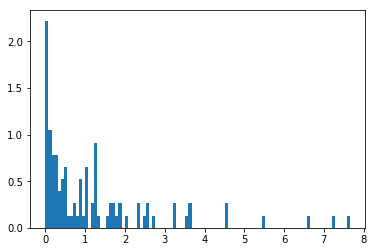

In [43]:
dvalsfin = []
for i in range(len(dvalsllh)):
    dvalsfin.append(2*(dvalsllh2[i]-dvalsllh[i]))

import matplotlib.pyplot as plt
plt.hist(dvalsfin, bins=100,normed=True)

fig1 = plt.gcf()

plt.show()

fig1.savefig('2lnlambda.eps', dpi=1200)

Determine if they are chi-squared distributed: We expect 1 degree of freedom. Minimization routine returns 1 degree of freedom:

In [44]:
from scipy.stats import chi2

def LLH1(x):
    b = x[0]
    dat = list()
    for x in dvalsfin:
        val = -np.log( chi2.pdf(x,b) )
        dat.append(val)
    return sum(dat);

from scipy.optimize import minimize

x0 = np.array([1])

res = minimize(LLH1,x0)
res.x

array([ 1.16960272])

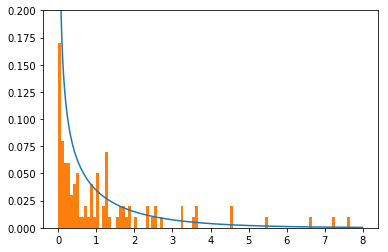

In [72]:
xplotvals = np.arange(0, 8, 0.01)
y0 = chi2.pdf(xplotvals,1)/7
#y0 = np.sin((5.96185442*xplotvals+1))**2
plt.plot(xplotvals,y0)
weights = np.ones_like(dvalsfin)/float(len(dvalsfin))
x, y, _ = plt.hist(dvalsfin, weights=weights,bins=100)
plt.ylim(0,0.2)

fig1 = plt.gcf()

plt.show()

fig1.savefig('chisquared.eps', dpi=1200)

We calculate the chi-square and the resulting p-value:

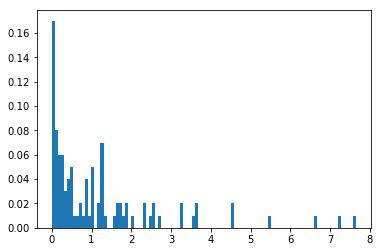

In [82]:
weights = np.ones_like(dvalsfin)/float(len(dvalsfin))
plt.hist(dvalsfin, weights=weights,bins=100)
plt.show()

In [73]:
y, x, _ = plt.hist(dvalsfin,weights=weights,bins=100)
xvals = list()
for i in range((len(x)-1)):
    val = (x[i]+x[i+1])/2
    xvals.append(val)
yvals = list()
for i in xvals:
    val = chi2.pdf(i,1)/7
    yvals.append(val)
chicalc = list()
for i in range(len(y)):
    val = ((y[i]-yvals[i])**2)/yvals[i]
    chicalc.append(val)
print(sum(chicalc))

import scipy.integrate as integrate
from scipy.stats import chi2

res = integrate.quad(lambda x: chi2.pdf(x,1), sum(chicalc), np.inf)
res[0]

1.4145825977


0.23429714311779307

In [63]:
import scipy.integrate as integrate
from scipy.stats import chi2

res = integrate.quad(lambda x: chi2.pdf(x,1), 1.62215140536, np.inf)
res[0]

0.20279206557961427

Yes, it is chi-squared distributed.

Number of pseudo-experiments with $-2\ln (\lambda) > 2.706$:

In [38]:
sum(i > 2.706 for i in dvalsfin)

11

Expected number of values above 2.706:

In [99]:
res = integrate.quad(lambda x: chi2.pdf(x,1), 2.706, np.inf)
res[0]*100

9.99713781252492

## Problem 2c)

We must calculate the log-likelihood for all of the 20000 entries with $b=1$, $0 < \sigma < \infty$ and subsequently for $0 < b < \infty$, $0 < \sigma < \infty$.

In [108]:
def LLH1(x):
    b = x[0]
    sigma = x[1]
    dat = list()
    for t in df['Values']:
        val = -np.log( (1/2)*np.exp(-t/b)*(np.exp(t/b)*np.exp(-(1/2)*(2*b*t-sigma**2)/b**2)+np.exp((1/2)*sigma**2/b**2)*erf((1/2)*np.sqrt(2)*(b*t-sigma**2)/(sigma*b)))/b )
        dat.append(val)
    return sum(dat);

from scipy.optimize import minimize

x0 = np.array([1,0.5])
cons = [{'type':'ineq', 'fun': lambda x: x}, {'type':'ineq', 'fun': lambda x: x}]

res = minimize(LLH1,x0,constraints=cons)
res.x

C:\Users\Bo\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in log
C:\Users\Bo\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in log
C:\Users\Bo\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: overflow encountered in exp
C:\Users\Bo\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars


array([ 0.99330959,  0.61861697])

The corresponding likelihood value:

In [111]:
b = 0.99330959
sigma = 0.61861697
dat = list()
for t in df['Values']:
    val = -np.log( (1/2)*np.exp(-t/b)*(np.exp(t/b)*np.exp(-(1/2)*(2*b*t-sigma**2)/b**2)+np.exp((1/2)*sigma**2/b**2)*erf((1/2)*np.sqrt(2)*(b*t-sigma**2)/(sigma*b)))/b )
    dat.append(val)
sum(dat)

29652.740558323614

In [113]:
b=1
def LLH1(x):
    sigma = x[0]
    dat = list()
    for t in df['Values']:
        val = -np.log( (1/2)*np.exp(-t/b)*(np.exp(t/b)*np.exp(-(1/2)*(2*b*t-sigma**2)/b**2)+np.exp((1/2)*sigma**2/b**2)*erf((1/2)*np.sqrt(2)*(b*t-sigma**2)/(sigma*b)))/b )
        dat.append(val)
    return sum(dat);

from scipy.optimize import minimize

x0 = np.array([0.5])
cons = [{'type':'ineq', 'fun': lambda x: x}, {'type':'ineq', 'fun': lambda x: x}]

res = minimize(LLH1,x0,constraints=cons)
res.x

C:\Users\Bo\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: overflow encountered in exp
C:\Users\Bo\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars


array([ 0.61776509])

In [114]:
b = 1
sigma = 0.61776509
dat = list()
for t in df['Values']:
    val = -np.log( (1/2)*np.exp(-t/b)*(np.exp(t/b)*np.exp(-(1/2)*(2*b*t-sigma**2)/b**2)+np.exp((1/2)*sigma**2/b**2)*erf((1/2)*np.sqrt(2)*(b*t-sigma**2)/(sigma*b)))/b )
    dat.append(val)
sum(dat)

29653.080104114022

$-2\ln(\lambda)$:

In [120]:
lnratio = 29653.080104114022-29652.740558323614
2*lnratio

0.6790915808160207

In [121]:
import scipy.integrate as integrate
from scipy.stats import chi2

res = integrate.quad(lambda x: chi2.pdf(x,1), 0.68, np.inf)
res[0]

0.4095867241206976

Knowing that the distribution is chi-squared, the p-value is not strong enough to reject the null hypothesis at $3\sigma$. This is also clear from the fact that the estimated value of $b$ is very close to $1$ from the maximum likelihood estimation.